In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [6]:
spinup = glob('data.zarr/spinup/clm/441/*/')
domain = glob('data.zarr/spinup/clm/domain/')
files = [spinup,domain]
ds = xr.open_mfdataset(files,engine='zarr',chunks='auto')

In [42]:
init_tstor = ds.init_surfstor.sum(dim=['y','x']) + ds.init_subsurfstor.sum(dim=['z','y','x'])

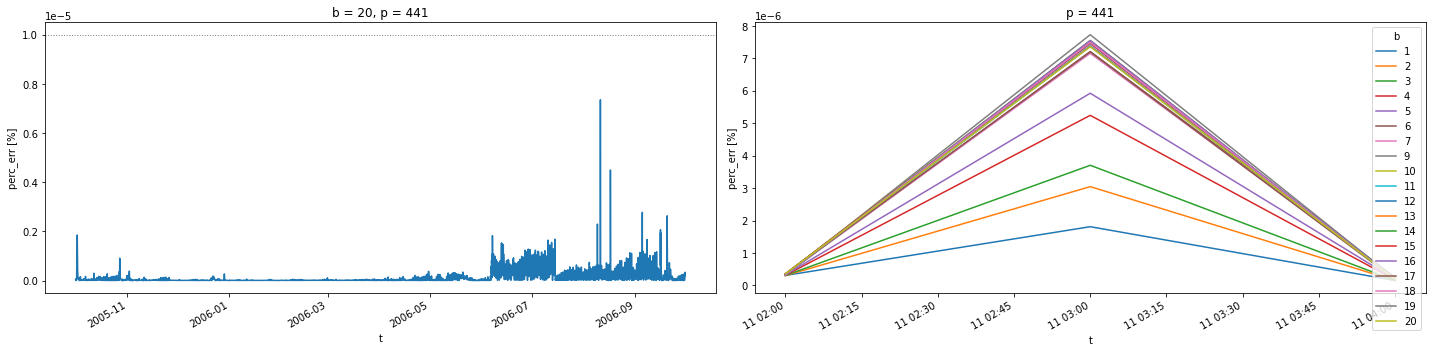

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=[20,5])
ds.perc_err.sel(t=slice(None,None),b=20).plot(hue='b',ax=ax[0])
ds.perc_err.sel(t=slice('2006-08-11 02:00','2006-08-11 04:00'),b=slice(None,None)).plot(hue='b',ax=ax[1])
ax[0].axhline(1e-5,linestyle=':',color='tab:grey',linewidth=1,label='acceptable threshold')
plt.tight_layout()

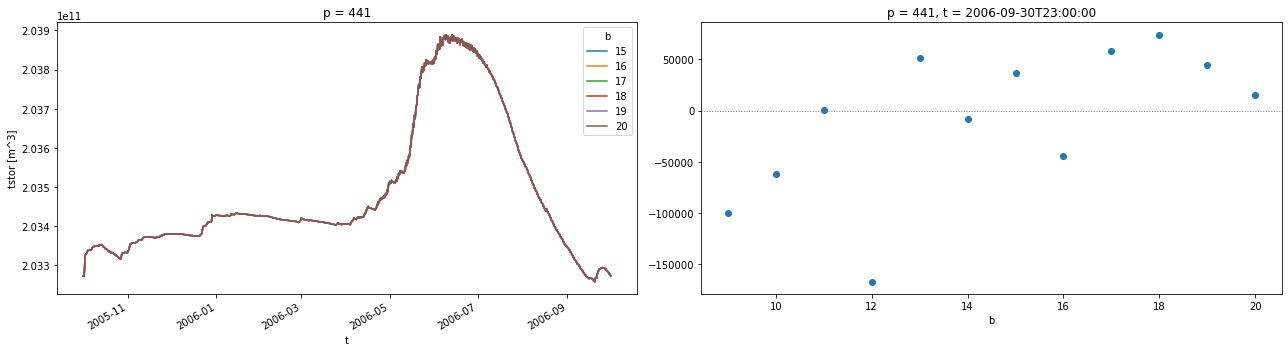

In [46]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=[18,5])
ds.tstor.sel(t=slice(start,stop),b=slice(15,None)).plot(hue='b',ax=ax[0])
(ds.tstor.isel(t=-1) - init_tstor).sel(b=slice(8,None)).plot(ax=ax[1],linestyle='',marker='o')
#(((ds.tstor.isel(t=-1) - init_tstor)/init_tstor)*100).sel(b=slice(5,None)).plot(ax=ax[1],linestyle='',marker='o')
ax[1].axhline(0,linestyle=':',linewidth=1,color='tab:grey')
plt.tight_layout()

In [10]:
ensemble = glob('data.zarr/ensemble/Bcs/p/*/')
domain = glob('data.zarr/ensemble')
ds = xr.open_mfdataset(ensemble,engine='zarr',chunks='auto')

In [11]:
ds

<xarray.Dataset>
Dimensions:           (b: 1, c: 1, h: 1, t: 8760, x: 64, y: 128, z: 25)
Coordinates:
  * b                 (b) int64 15
  * c                 (c) <U1 'p'
  * h                 (h) float64 0.8
  * t                 (t) datetime64[ns] 2005-10-01 ... 2006-09-30T23:00:00
  * x                 (x) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
  * y                 (y) int64 1 2 3 4 5 6 7 8 ... 122 123 124 125 126 127 128
  * z                 (z) int64 1 2 3 4 5 6 7 8 9 ... 17 18 19 20 21 22 23 24 25
Data variables:
    dstor             (b, c, h, t) float64 dask.array<chunksize=(1, 1, 1, 8760), meta=np.ndarray>
    dsubsurf          (b, c, h, t) float64 dask.array<chunksize=(1, 1, 1, 8760), meta=np.ndarray>
    dsurf             (b, c, h, t) float64 dask.array<chunksize=(1, 1, 1, 8760), meta=np.ndarray>
    eflx_lh_tot       (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 8760, 128, 64), meta=np.ndarray>
    eflx_lwrad_out    (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 8760, 128, 64), meta=np.ndarray>
    eflx_sh_tot       (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 8760, 128, 64), meta=np.ndarray>
    eflx_soil_grnd    (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 8760, 128, 64), meta=np.ndarray>
    err               (b, c, h, t) float64 dask.array<chunksize=(1, 1, 1, 8760), meta=np.ndarray>
    evaptrans         (b, c, h, t, z, y, x) float64 dask.array<chunksize=(1, 1, 1, 73, 25, 64, 64), meta=np.ndarray>
    evaptranssum      (b, c, h, t, z, y, x) float64 dask.array<chunksize=(1, 1, 1, 73, 25, 64, 64), meta=np.ndarray>
    expstor           (b, c, h, t) float64 dask.array<chunksize=(1, 1, 1, 8760), meta=np.ndarray>
    gwstor            (b, c, h, t, z, y, x) float64 dask.array<chunksize=(1, 1, 1, 1095, 4, 16, 8), meta=np.ndarray>
    indicator         (b, c, h, z, y, x) float64 dask.array<chunksize=(1, 1, 1, 13, 64, 64), meta=np.ndarray>
    init_gwstor       (b, c, h, z, y, x) float64 dask.array<chunksize=(1, 1, 1, 13, 64, 64), meta=np.ndarray>
    init_subsurfstor  (b, c, h, z, y, x) float64 dask.array<chunksize=(1, 1, 1, 13, 64, 64), meta=np.ndarray>
    init_surfstor     (b, c, h, y, x) float64 dask.array<chunksize=(1, 1, 1, 128, 64), meta=np.ndarray>
    init_wtdepth      (b, c, h, y, x) float64 dask.array<chunksize=(1, 1, 1, 128, 64), meta=np.ndarray>
    overlandflow      (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 1095, 16, 16), meta=np.ndarray>
    overlandsum       (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 1752, 128, 64), meta=np.ndarray>
    perc_err          (b, c, h, t) float64 dask.array<chunksize=(1, 1, 1, 8760), meta=np.ndarray>
    press             (b, c, h, t, z, y, x) float64 dask.array<chunksize=(1, 1, 1, 73, 25, 64, 64), meta=np.ndarray>
    qflx_evap_grnd    (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 8760, 128, 64), meta=np.ndarray>
    qflx_evap_soi     (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 8760, 128, 64), meta=np.ndarray>
    qflx_evap_tot     (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 8760, 128, 64), meta=np.ndarray>
    qflx_evap_veg     (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 8760, 128, 64), meta=np.ndarray>
    qflx_infl         (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 8760, 128, 64), meta=np.ndarray>
    qflx_tran_veg     (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 8760, 128, 64), meta=np.ndarray>
    satur             (b, c, h, t, z, y, x) float64 dask.array<chunksize=(1, 1, 1, 73, 25, 64, 64), meta=np.ndarray>
    subsurfstor       (b, c, h, t, z, y, x) float64 dask.array<chunksize=(1, 1, 1, 1095, 4, 16, 8), meta=np.ndarray>
    surfstor          (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 1095, 16, 16), meta=np.ndarray>
    swe_out           (b, c, h, t, y, x) float64 dask.array<chunksize=(1, 1, 1, 8760, 128, 64), meta=np.ndarray>
    t_grnd            (b, c, h, t, y, x) float64 